In [ ]:
import random
from matplotlib import pyplot as plt

In [170]:
class QLearning:
    def __init__(self, learning_rate=0.1, discount_factor=0.9, epsilon=0.5, reward_function=None, get_next_state=None, possible_actions=None):
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.reward_function = reward_function if reward_function is not None else lambda state: 0
        self.q_table = {}
        self.get_next_state = get_next_state if get_next_state is not None else lambda state,action : state  # Default to returning the same state
        self.possible_actions = possible_actions if possible_actions is not None else []
        

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0.0)
    
    def set_q_value(self, state, action, value):
        self.q_table[(state, action)] = value

    def choose_action(self, state, possible_actions):
        if random.random() < self.epsilon:
            return random.choice(possible_actions)
        else:
            q_values = [self.get_q_value(state, action) for action in possible_actions]
            max_q_value = max(q_values)
            best_actions = [action for action, q in zip(possible_actions, q_values) if q == max_q_value]
            return random.choice(best_actions)

    def update(self, state, action, reward, next_state, possible_next_actions):
        current_q = self.get_q_value(state, action)
        max_next_q = max(self.get_q_value(next_state, next_action) for next_action in possible_next_actions)
        new_q = current_q + self.learning_rate * (reward + self.discount_factor * max_next_q - current_q)
        self.set_q_value(state, action, new_q)

    def reset(self):
        self.q_table.clear()
        
    def get_policy(self, state, possible_actions):
        q_values = [self.get_q_value(state, action) for action in possible_actions]
        max_q_value = max(q_values)
        best_actions = [action for action, q in zip(possible_actions, q_values) if q == max_q_value]
        return best_actions[0] if best_actions else None
    
    def train_q_learning(self, initial_state, max_episodes = 100 ,max_steps=100):
        
        for episode in range(max_episodes):
            state = initial_state
            for _ in range(max_steps):
                possible_actions = self.possible_actions(state)
                
                if not possible_actions:
                    break
                
                action = self.choose_action(state, possible_actions)
                reward = self.reward_function(state)
                next_state = self.get_next_state(state, action)  
                self.update(state, action, reward, next_state, self.possible_actions(next_state))
                state = next_state
    
    

In [171]:

# Define a simple grid world problem instance for Q-learning

grid_columns = random.randint(10, 20)
grid_rows = random.randint(10, 20)

grid_size = (grid_rows, grid_columns)  
initial_state = (0, 0) 
goal_state = (0,0) 
while goal_state == initial_state:
    goal_state = (random.randint(0, grid_rows - 1), random.randint(0, grid_columns - 1))
    
eps = random.random()
num_obstacles = random.randint(1, grid_rows * grid_columns // 2)
obstacles = set()

while len(obstacles) < num_obstacles:
    obstacle = (random.randint(0, grid_rows - 1), random.randint(0, grid_columns - 1))
    if obstacle != goal_state and obstacle != initial_state:
        
        if random.random() > eps:
            continue
        obstacles.add(obstacle)

def reward_function(state):
    if state == goal_state:
        return 1e12
    elif state in obstacles:
        return -1e9
    else:
        return 0  # small penalty for each move

def get_next_state(state, action):
    # Actions: 'up', 'down', 'left', 'right'
    x, y = state
    if action == 'up':
        x = max(0, x - 1)
    elif action == 'down':
        x = min(grid_size[0] - 1, x + 1)
    elif action == 'left':
        y = max(0, y - 1)
    elif action == 'right':
        y = min(grid_size[1] - 1, y + 1)
    next_state = (x, y)
    if next_state in obstacles:
        return state  # stay in place if hitting obstacle
    return next_state

def possible_actions(state):
    x, y = state
    actions = []
    if x > 0: actions.append('up')  # can move up
    if x < grid_size[0] - 1: actions.append('down')  # can move down
    if y > 0: actions.append('left')  # can move left
    if y < grid_size[1] - 1: actions.append('right')
    
    return actions


ql = QLearning(learning_rate=0.1, discount_factor=0.9, epsilon=0.5,
               reward_function=lambda state : reward_function(state),
               get_next_state=lambda state, action: get_next_state(state, action),
               possible_actions=lambda state: possible_actions(state))
ql.train_q_learning(initial_state, max_episodes=100, max_steps=10000)

def show_path(ql, initial_state):
    state = initial_state
    path = [state]
    
    step = 0
    
    found = False
    
    while state != goal_state:
        step += 1
        if step > 1000:  # Prevent infinite loop
            found = False
            print("Exceeded maximum steps without reaching goal state.")
            break
        
        if state == goal_state:
            found = True
            break
        
        possible_actions_list = possible_actions(state)
        action = ql.get_policy(state, possible_actions_list)
        if action is None:
            break
        
        state = get_next_state(state, action)
        path.append(state)
    
    return path

path = show_path(ql, initial_state)

if not path or path[-1] != goal_state:
    print("No valid path found to the goal state.")
else:
    print("Path found to the goal state:", path)

print("Initial State:", initial_state)
print("Goal State:", goal_state)
print("Obstacles:", obstacles)
print("Path taken by the agent:", path)
print("Q-table:", ql.q_table)


Path found to the goal state: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4)]
Initial State: (0, 0)
Goal State: (2, 4)
Obstacles: {(12, 1), (14, 4), (14, 7), (1, 16), (4, 12), (14, 10), (3, 16), (14, 13), (0, 5), (8, 6), (10, 12), (2, 11), (13, 5), (2, 14), (15, 14), (6, 5), (16, 13), (7, 10), (14, 3), (14, 12), (5, 9), (10, 2), (8, 14), (9, 13), (1, 5), (13, 7), (15, 1), (15, 13), (13, 13), (6, 7), (14, 2), (4, 7), (12, 14), (12, 8), (5, 2), (3, 8), (8, 4), (4, 13), (10, 7), (11, 6), (0, 12), (10, 10), (13, 9), (8, 13), (13, 6), (6, 0), (2, 15), (16, 14), (6, 9)}
Path taken by the agent: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4)]
Q-table: {((0, 0), 'down'): 2797018059076.365, ((1, 0), 'up'): 2517306469098.704, ((0, 0), 'right'): 2797057894735.601, ((0, 1), 'right'): 3107842105263.122, ((0, 2), 'right'): 3453157894736.8047, ((0, 3), 'down'): 3836842105263.119, ((1, 3), 'left'): 3453157894736.8047, ((1, 2), 'left'): 3107842105263.122, ((1, 1), 'down'): 34531578947

In [172]:
ql.q_table

{((0, 0), 'down'): 2797018059076.365,
 ((1, 0), 'up'): 2517306469098.704,
 ((0, 0), 'right'): 2797057894735.601,
 ((0, 1), 'right'): 3107842105263.122,
 ((0, 2), 'right'): 3453157894736.8047,
 ((0, 3), 'down'): 3836842105263.119,
 ((1, 3), 'left'): 3453157894736.8047,
 ((1, 2), 'left'): 3107842105263.122,
 ((1, 1), 'down'): 3453157894736.8047,
 ((2, 1), 'down'): 3107842105263.122,
 ((3, 1), 'up'): 3453157894736.8047,
 ((3, 1), 'down'): 2797057894736.8076,
 ((4, 1), 'right'): 3107829482924.5796,
 ((4, 2), 'left'): 2797057894736.8076,
 ((4, 1), 'down'): 2517348252865.9688,
 ((5, 1), 'left'): 1951356901620.258,
 ((5, 0), 'right'): 1889516275858.3474,
 ((5, 0), 'down'): 1387816972699.3137,
 ((5, 0), 'up'): 2506636609195.2295,
 ((4, 0), 'up'): 2782705336472.0635,
 ((3, 0), 'up'): 3107545360578.1978,
 ((2, 0), 'up'): 2797057806246.9355,
 ((1, 0), 'right'): 3107842105263.122,
 ((1, 1), 'left'): 2797057894736.606,
 ((1, 1), 'up'): 2797057894734.8145,
 ((0, 1), 'left'): 2517352021701.5103,
 ((0

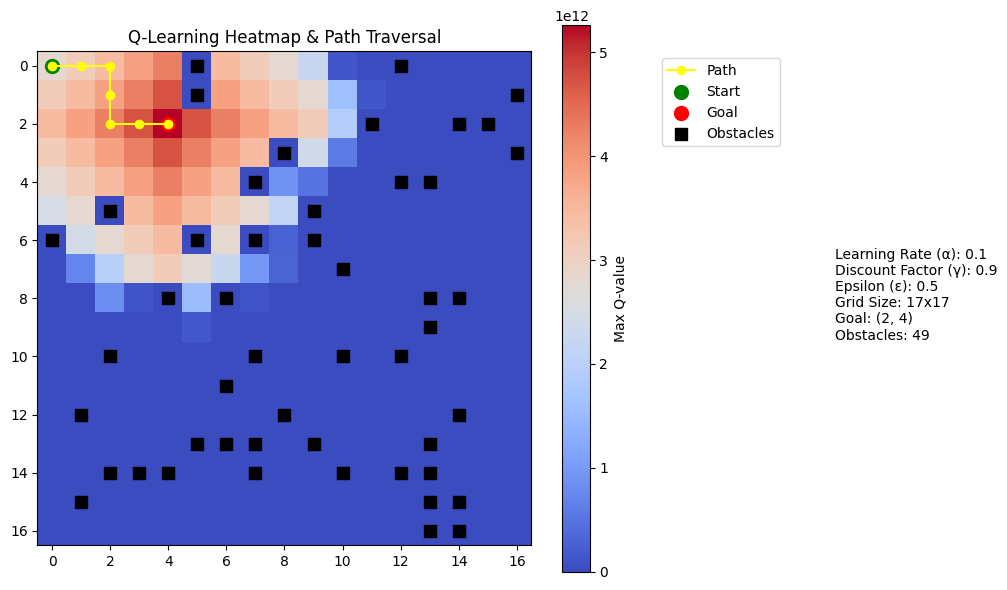

Heatmap saved as q_learning_heatmap.png


In [173]:
# 1. Prepare heatmap
heatmap = [[0 for _ in range(grid_columns)] for _ in range(grid_rows)]
for (state, action), q_value in ql.q_table.items():
    r, c = state
    heatmap[r][c] = max(heatmap[r][c], q_value)

# 2. Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, cmap="coolwarm", origin="upper")
plt.colorbar(label="Max Q-value")

# 3. Overlay path
path = show_path(ql, initial_state)
path_x = [pos[1] for pos in path]
path_y = [pos[0] for pos in path]
plt.plot(path_x, path_y, color="yellow", marker="o", label="Path")

# 4. Mark start & goal
plt.scatter(initial_state[1], initial_state[0], color="green", s=100, label="Start")
plt.scatter(goal_state[1], goal_state[0], color="red", s=100, label="Goal")

# 5. Mark obstacles
obs_x = [pos[1] for pos in obstacles]
obs_y = [pos[0] for pos in obstacles]
plt.scatter(obs_x, obs_y, color="black", marker="s", s=80, label="Obstacles")

# 6. Add text for hyperparameters
params_text = (
    f"Learning Rate (α): {ql.learning_rate}\n"
    f"Discount Factor (γ): {ql.discount_factor}\n"
    f"Epsilon (ε): {ql.epsilon}\n"
    f"Grid Size: {grid_rows}x{grid_columns}\n"
    f"Goal: {goal_state}\n"
    f"Obstacles: {len(obstacles)}"
)
plt.gcf().text(1.05, 0.5, params_text, fontsize=10, va="center")

# 7. Final touches
plt.title("Q-Learning Heatmap & Path Traversal")
# Move legend to the right and add extra space
plt.legend(loc="upper left", bbox_to_anchor=(1.25, 1.0))
plt.subplots_adjust(right=0.7)  # leaves room for legend & params text


# 8. Save and show
plt.tight_layout()
plt.savefig("q_learning_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

print("Heatmap saved as q_learning_heatmap.png")
